In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DSBDA/Dataset/airquality.csv')
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,24-11-2017,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,25-11-2017,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,26-11-2017,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,27-11-2017,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,28-11-2017,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [3]:
df.isnull().sum()

,0
StationId,0
Date,0
PM2.5,21625
PM10,42706
NO,17106
NO2,16547
NOx,15500
NH3,48105
CO,12998
SO2,25204


In [4]:
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

In [5]:
categorical_cols = ['AQI_Bucket']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [6]:
df.isnull().sum()

,0
StationId,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [7]:
df.columns

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

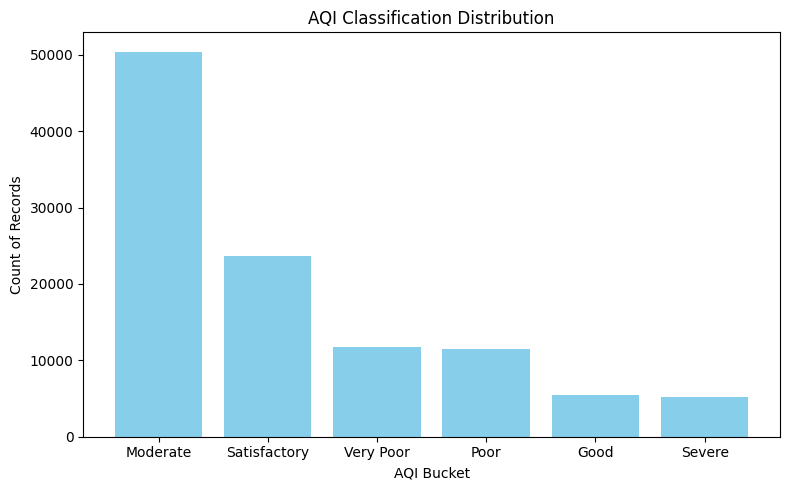

In [8]:
counts = df['AQI_Bucket'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(counts.index, counts.values, color='skyblue')
plt.title('AQI Classification Distribution')
plt.xlabel('AQI Bucket')
plt.ylabel('Count of Records')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

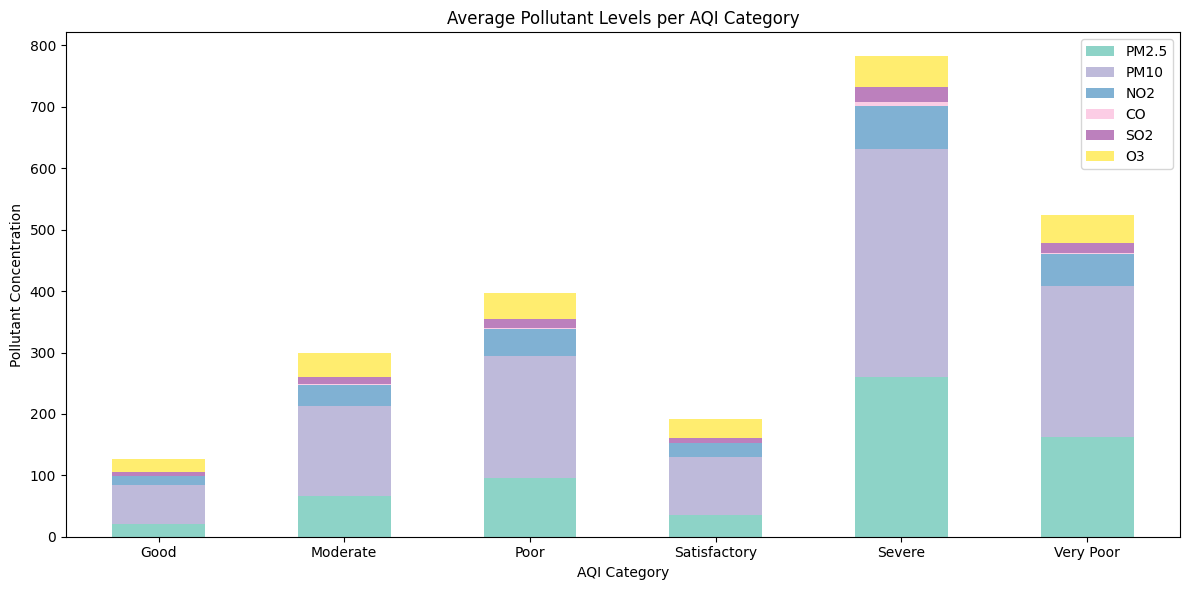

In [9]:
grouped = df.groupby('AQI_Bucket')[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']].mean()
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Average Pollutant Levels per AQI Category')
plt.xlabel('AQI Category')
plt.ylabel('Pollutant Concentration')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


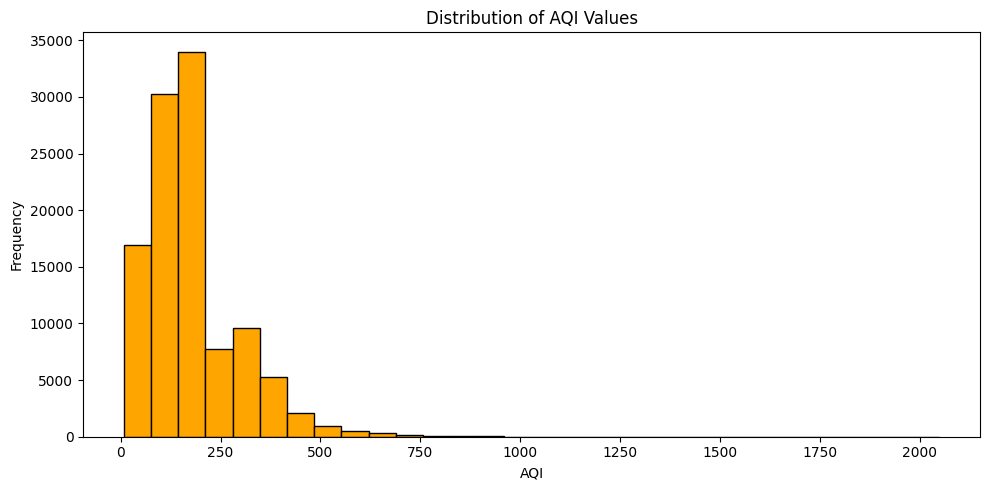

In [10]:
plt.figure(figsize=(10, 5))
plt.hist(df['AQI'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of AQI Values')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


<ipython-input-11-3fe144bf4efe>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=aqi_buckets)


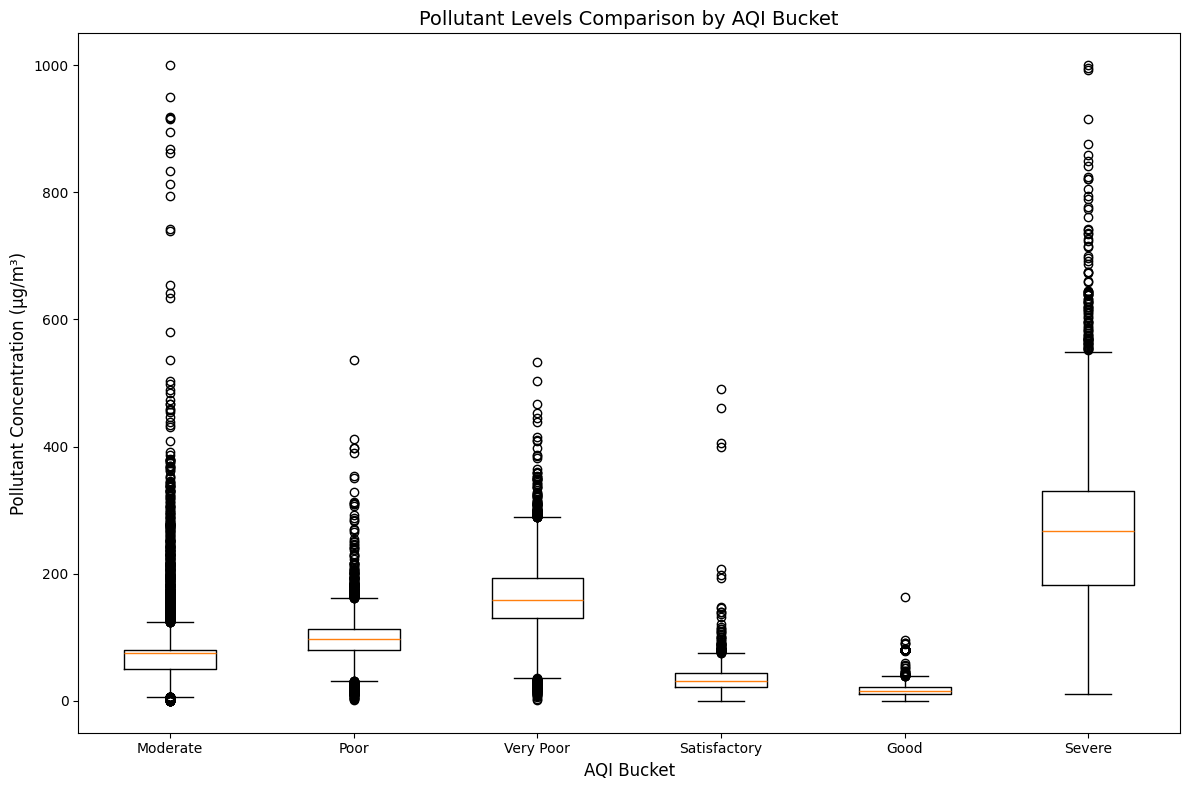

In [11]:
# 3. Box Plot for PM2.5 by AQI Bucket
plt.figure(figsize=(12, 8))
aqi_buckets = df['AQI_Bucket'].unique()
data = [df[df['AQI_Bucket'] == bucket]['PM2.5'].dropna() for bucket in aqi_buckets]
plt.boxplot(data, labels=aqi_buckets)
plt.title('Pollutant Levels Comparison by AQI Bucket', fontsize=14)
plt.xlabel('AQI Bucket', fontsize=12)
plt.ylabel('Pollutant Concentration (µg/m³)', fontsize=12)
plt.tight_layout()
plt.show()

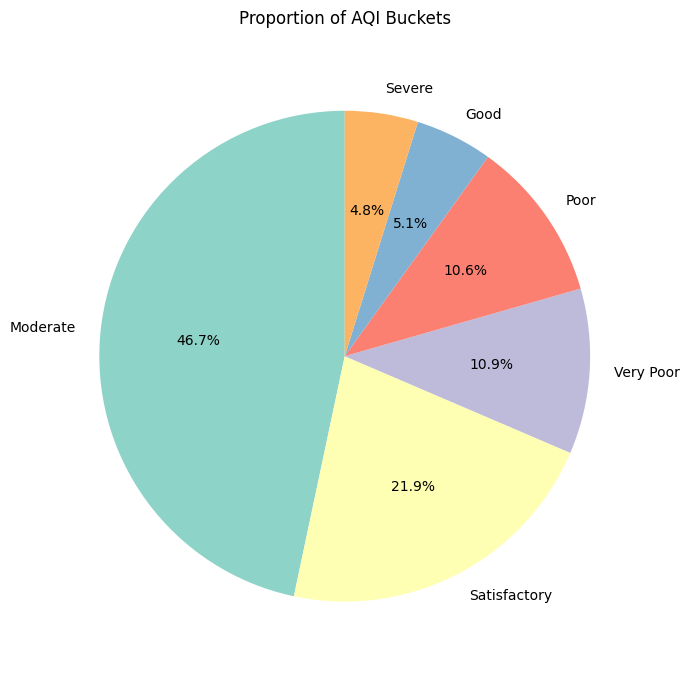

In [12]:
# Count AQI Bucket categories
aqi_counts = df['AQI_Bucket'].value_counts()

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(aqi_counts.values, labels=aqi_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Proportion of AQI Buckets')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.tight_layout()
plt.show()

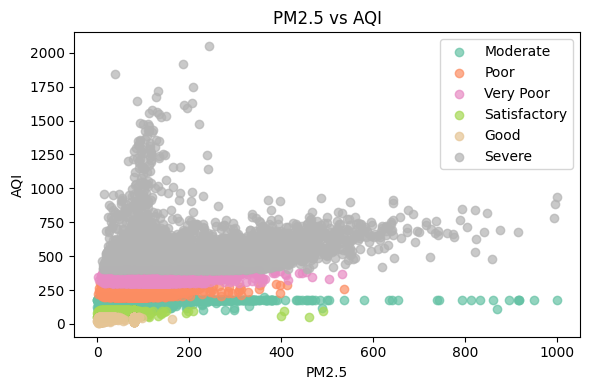

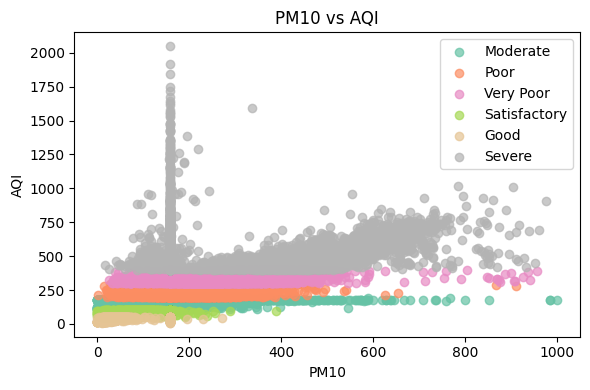

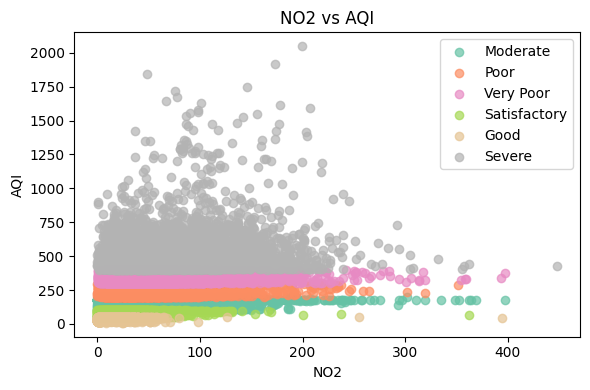

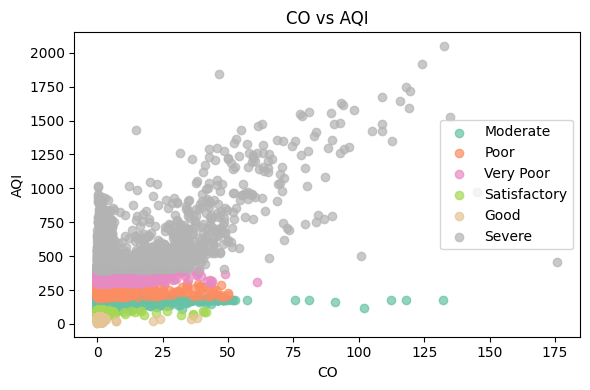

In [13]:
# 5. Scatter plots of pollutants vs AQI
for pollutant in ['PM2.5', 'PM10', 'NO2', 'CO']:
    plt.figure(figsize=(6, 4))
    aqi_buckets = df['AQI_Bucket'].unique()
    colors = plt.cm.Set2(np.linspace(0, 1, len(aqi_buckets)))
    for i, bucket in enumerate(aqi_buckets):
        subset = df[df['AQI_Bucket'] == bucket]
        plt.scatter(subset[pollutant], subset['AQI'], label=bucket, alpha=0.7, color=colors[i])
    plt.title(f'{pollutant} vs AQI')
    plt.xlabel(pollutant)
    plt.ylabel('AQI')
    plt.legend()
    plt.tight_layout()
    plt.show()